In [1]:
#from google.colab import drive
#drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# uses library
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import os

## step1:  speech to 10 word of wav file


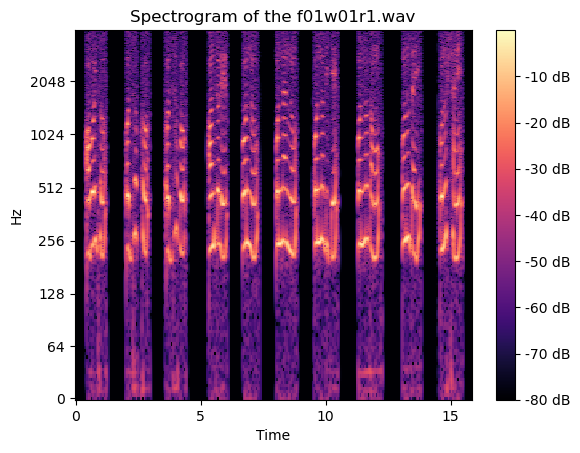

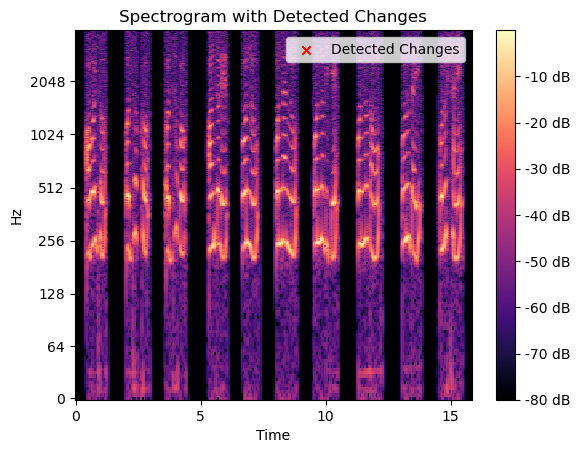

In [7]:
# Specify the input audio file
input_file = "C:/Users/ZBOOK 14U G5/Documents/WAV to MFCC/inputwav/f01w01r1.wav"

spectrogram_plots = "C:/Users/ZBOOK 14U G5/Documents/WAV to MFCC/spectrogram_plots/"
os.makedirs(spectrogram_plots, exist_ok=True)

# Load the audio file
y, sr = librosa.load(input_file, sr=None)

# Calculate the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Plot the spectrogram
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
#plt.title('WAV file')
plt.title(f"Spectrogram of the {os.path.basename(input_file)}")
plt.savefig(os.path.join(spectrogram_plots, f"{os.path.basename(input_file)}_spectrogram.png"))
plt.show()

# Apply thresholding to detect changes in the spectrum
threshold = 20  # Adjust this threshold based on your analysis
changes = np.where(D > threshold)

# Convert changes to time points
change_times = librosa.frames_to_time(changes[1], sr=sr)

# Plot the spectrogram with detected changes
plt.figure()
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Detected Changes')
plt.scatter(change_times, [0] * len(change_times), color='red', marker='x', label='Detected Changes')
plt.legend()
plt.show()

# Create an output folder if it doesn't exist
output_folder = "C:/Users/ZBOOK 14U G5/Documents/WAV to MFCC/trimWord/"
os.makedirs(output_folder, exist_ok=True)

# Segment the audio based on detected changes
segments = librosa.effects.split(y, top_db=threshold, frame_length=4096, hop_length=128)

# Save each segment to a separate file
for i, segment in enumerate(segments):
    start, end = segment
    segment_audio = y[start:end]
    output_file = os.path.join(output_folder, f"{i}_{os.path.basename(input_file)}")
    sf.write(output_file, segment_audio, sr)


In [8]:
#play audio
ipd.Audio(input_file)

## step2: produce 250 MFCC value of word.wav file

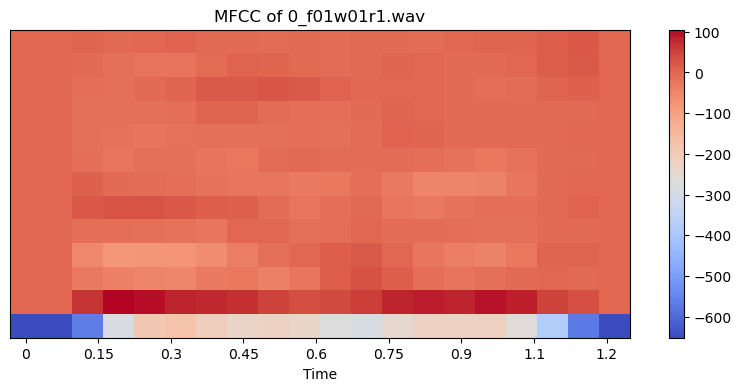

In [11]:
# Function to extract and save MFCC features
def extract_and_save_mfcc(input_file, output_folder):
    # Load the audio file
    y, sr = librosa.load(input_file, sr=None)

    # Extract MFCC features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust n_mfcc as needed

    # Scale each MFCC coefficient to the range -127 to 127
    mfcc_scaled = (mfcc - np.min(mfcc)) / (np.max(mfcc) - np.min(mfcc)) * 254 - 127

    # Flatten the MFCC matrix to a one-dimensional array (up to 250 values)
    flattened_mfcc = mfcc_scaled.flatten()[:250]

    # Ensure the flattened MFCC array always has 250 values
    mfcc_values = np.zeros(250)
    mfcc_values[:len(flattened_mfcc)] = flattened_mfcc

    # Round each value to 6 decimal places and format without exponential notation
    formatted_mfcc = ["{:.6f}".format(value) for value in mfcc_values]

    # Save the formatted MFCC array to a text file
    output_file = os.path.join(output_folder, f"{os.path.basename(input_file)}.txt")
    with open(output_file, 'w') as f:
        f.write("\n".join(formatted_mfcc))

    # Visualize MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f"MFCC of {os.path.basename(input_file)}")
    plt.show()

# Specify the input audio file
input_file = "C:/Users/ZBOOK 14U G5/Documents/WAV to MFCC/trimWord/0_f01w01r1.wav"

# Create an output folder if it doesn't exist
output_folder = "C:/Users/ZBOOK 14U G5/Documents/WAV to MFCC/word_mfc/"
os.makedirs(output_folder, exist_ok=True)

# Extract and save MFCC features
extract_and_save_mfcc(input_file, output_folder)
